In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Program Skripsi/data_teks.csv')
df

,Komentar,Label
0,Acara ini terasa kurang menarik dibandingkan g...,Kontra
1,"Peserta tidak terlihat siap, sehingga kompetis...",Kontra
2,Beberapa tantangan yang diberikan terlalu suli...,Kontra
3,"Meskipun konsepnya menarik, pelaksanaannya kur...",Kontra
4,"Penilaian juri terasa tidak objektif, sehingga...",Kontra
...,...,...
2995,"Acara Clash of Champions sangat memuaskan, sem...",Pro
2996,"Gue sangat senang nonton Clash of Champions, a...",Pro
2997,Penyelenggaraan Clash of Champions sangat baik...,Pro
2998,"Acara Clash of Champions sangat inspiratif, se...",Pro


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Contoh stopwords (bisa ditambah sesuai kebutuhan)
stop_words = set([
    'dan', 'di', 'yang', 'ke', 'dari', 'untuk', 'pada', 'dengan',
    'ini', 'itu', 'adalah', 'atau', 'saya', 'kami', 'kita'
])

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['Cleaned'] = df['Komentar'].apply(preprocess_text)

In [ ]:
label_map = {'Pro': 2, 'Netral': 1, 'Kontra': 0}
df['Label'] = df['Label'].map(label_map)

In [ ]:
MAX_WORDS = None

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Cleaned'])

sequences = tokenizer.texts_to_sequences(df['Cleaned'])
MAX_LEN = max(len(seq) for seq in sequences)
vocab_size = min(len(tokenizer.word_index) + 1, 10000)


padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

In [ ]:
X = padded_sequences
y = df['Label'].values

# First, split train+temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Then, split temp into val + test (val 10%, test 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

In [ ]:
# Mapping label angka ke teks
label_map = {0: 'Pro', 1: 'Netral', 2: 'Kontra'}

# Konversi sequence pelatihan menjadi teks
X_train_text = sequences_to_texts(X_train, tokenizer)
y_train_text = [label_map[label] for label in y_train]

# Buat DataFrame
train_df = pd.DataFrame({'Text': X_train_text, 'Label': y_train_text})

display(train_df)

,Text,Label
0,streaming clash berjalan lancar teknisnya tanp...,Netral
1,selama acara peserta saling memberikan motivas...,Netral
2,clash of champions bikin pengen nonton lagi pe...,Kontra
3,chat peserta banyak aktif berbagi tips dukunga...,Netral
4,beberapa tantangan diberikan terlalu sulit mem...,Pro
...,...,...
2095,chat peserta sangat antusias aktif berinteraks...,Netral
2096,pembawa acara perlu lebih memahami materi disa...,Pro
2097,clash of champions sangat sukses semua peserta...,Kontra
2098,clash of champions streamingnya memang lancar ...,Netral


In [ ]:
# Konversi sequence validasi menjadi teks
X_val_text = sequences_to_texts(X_val, tokenizer)
y_val_text = [label_map[label] for label in y_val]

# Buat DataFrame
val_df = pd.DataFrame({'Text': X_val_text, 'Label': y_val_text})

display(val_df)

,Text,Label
0,penyelenggaraan clash of champions ruangguru s...,Kontra
1,banyak peserta rajin ngobrol bikin suasana jad...,Netral
2,clash of champions berlangsung lancar peserta ...,Netral
3,sesi kuisnya terlalu sebentar soalnya gak ada ...,Pro
4,acaranya cukup oke tapi streaming clash of cha...,Netral
...,...,...
295,nonton youtube streamingnya lumayan lancar wal...,Netral
296,peserta clash of champions luar biasa bikin gu...,Kontra
297,selama acara peserta chat sangat aktif banyak ...,Netral
298,gue sangat menikmati clash of champions penyel...,Kontra


In [ ]:
# Konversi sequence pengujian menjadi teks
X_test_text = sequences_to_texts(X_test, tokenizer)
y_test_text = [label_map[label] for label in y_test]

# Buat DataFrame
test_df = pd.DataFrame({'Text': X_test_text, 'Label': y_test_text})

display(test_df)

,Text,Label
0,acaranya clash streamingnya sih lancar tapi ob...,Netral
1,peserta tampak enjoy mengikuti acara walau ada...,Netral
2,momenmomen penting dalam acara seringkali terl...,Pro
3,gue nonton aplikasi ruangguru streamingnya cuk...,Netral
4,chat peserta banyak bercanda bikin suasana jad...,Netral
...,...,...
595,peserta clash of champions bikin gue tambah se...,Kontra
596,sok tahu banget pesertanya tapi jawabannya zon...,Pro
597,udah gaya kayak jagoan tapi jawabannya ngawur ...,Pro
598,selama acara peserta menunjukkan antusiasme lu...,Netral


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(MAX_LEN,)),
    tf.keras.layers.Embedding(input_dim=58, output_dim=128),
    tf.keras.layers.SimpleRNN(128, return_sequences=False),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 58, 128)        │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,547 (174.01 KB)

 Trainable params: 44,547 (174.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5147 - loss: 0.9940 - val_accuracy: 0.8300 - val_loss: 0.5865
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8597 - loss: 0.4739 - val_accuracy: 0.9167 - val_loss: 0.2984
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9453 - loss: 0.2598 - val_accuracy: 0.9600 - val_loss: 0.1804
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9602 - loss: 0.1863 - val_accuracy: 0.9500 - val_loss: 0.1332
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9741 - loss: 0.1224 - val_accuracy: 0.9700 - val_loss: 0.1107
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9743 - loss: 0.1205 - val_accuracy: 0.9333 - val_loss: 0.1847
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9642 - loss: 0.1276 - val_accuracy: 0.9567 - val_loss: 0.1225
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9761 - loss: 0.0984 - val_accuracy: 0.9700 - val_lo

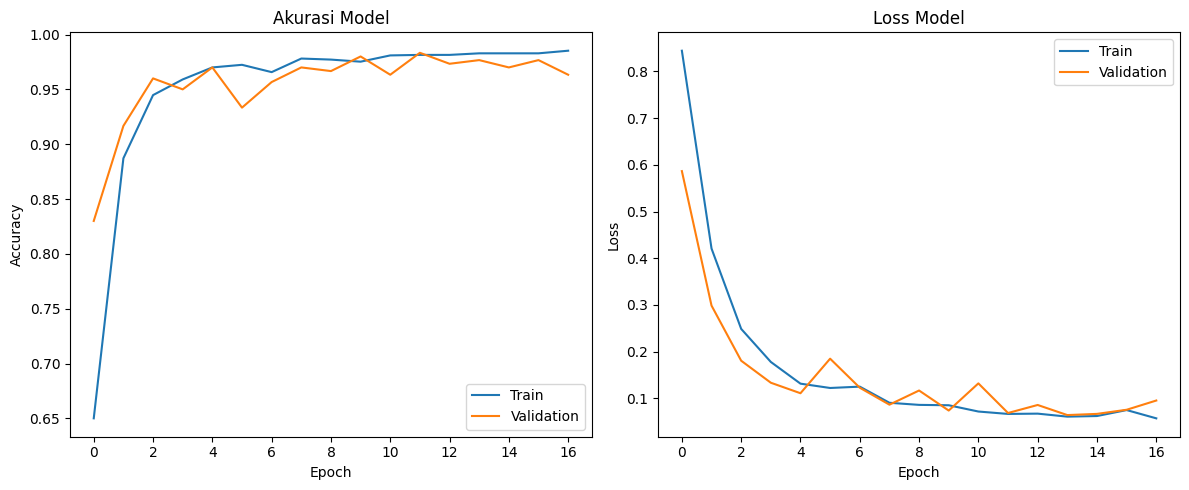

In [ ]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9781 - loss: 0.0752


In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


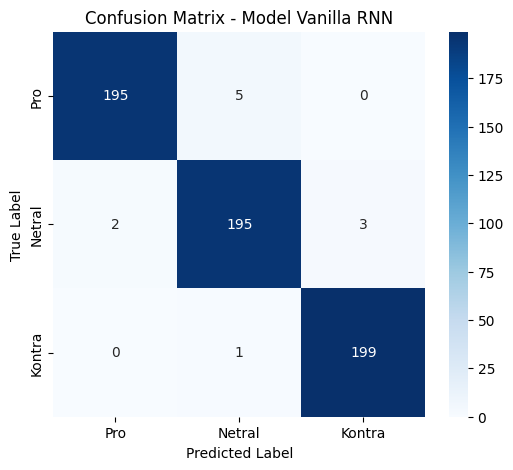

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pro', 'Netral', 'Kontra'], yticklabels=['Pro', 'Netral', 'Kontra'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Model Vanilla RNN')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Pro', 'Netral', 'Kontra'], digits=3))

Classification Report:
              precision    recall  f1-score   support

         Pro      0.990     0.975     0.982       200
      Netral      0.970     0.975     0.973       200
      Kontra      0.985     0.995     0.990       200

    accuracy                          0.982       600
   macro avg      0.982     0.982     0.982       600
weighted avg      0.982     0.982     0.982       600

